In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
import warnings
sns.set_style('whitegrid')
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Desktop\Master_Loan_Summary.csv')
df.head()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source
0,10149342,27050.0,36,0.1099,885.46,B,2013-12-01T00:00,debt_consolidation,0.0,27050.0,4702.53,0.0,0.0,2016-07-01T00:00,2016-08-01T00:00,0,COMPLETED,Lending Club
1,10149488,4800.0,36,0.1099,157.13,B,2013-12-01T00:00,home_improvement,0.0,4800.0,357.52,0.0,0.0,2014-09-01T00:00,2014-10-01T00:00,0,COMPLETED,Lending Club
2,10148122,12000.0,36,0.0762,373.94,A,2013-12-01T00:00,debt_consolidation,0.0,12000.0,1397.54,0.0,0.0,2016-06-01T00:00,2016-07-01T00:00,0,COMPLETED,Lending Club
3,10119623,12000.0,36,0.1199,398.52,B,2013-12-01T00:00,debt_consolidation,0.0,12000.0,2346.48,0.0,0.0,2017-01-01T00:00,2017-02-01T00:00,0,COMPLETED,Lending Club
4,10159498,12000.0,36,0.0662,368.45,A,2013-12-01T00:00,debt_consolidation,0.0,12000.0,1263.95,0.0,0.0,2017-01-01T00:00,2017-02-01T00:00,0,COMPLETED,Lending Club


In [3]:
df = df.drop(columns = ['data_source'])

In [4]:
df = df.drop(columns = ['loan_status_description'])

In [5]:
df = df.drop(columns = ['days_past_due'])

In [6]:
df = df.drop(columns = ['next_payment_due_date'])

In [7]:
df = df.drop(columns = ['last_payment_date'])

In [8]:
df = df.drop(columns = ['debt_sale_proceeds_received'])

In [9]:
df = df.drop(columns = ['late_fees_paid'])

In [10]:
df = df.drop(columns =['principal_balance'])

In [11]:
df = df.drop(columns = ['listing_title'])

In [12]:
df = df.drop(columns = ['grade'])

In [13]:
df = df.drop(columns = ['term'])

In [14]:
df.head()

,loan_number,amount_borrowed,borrower_rate,installment,origination_date,principal_paid,interest_paid
0,10149342,27050.0,0.1099,885.46,2013-12-01T00:00,27050.0,4702.53
1,10149488,4800.0,0.1099,157.13,2013-12-01T00:00,4800.0,357.52
2,10148122,12000.0,0.0762,373.94,2013-12-01T00:00,12000.0,1397.54
3,10119623,12000.0,0.1199,398.52,2013-12-01T00:00,12000.0,2346.48
4,10159498,12000.0,0.0662,368.45,2013-12-01T00:00,12000.0,1263.95


In [15]:
df['Total'] = df['principal_paid'] + df['interest_paid']

In [16]:
df.head()

,loan_number,amount_borrowed,borrower_rate,installment,origination_date,principal_paid,interest_paid,Total
0,10149342,27050.0,0.1099,885.46,2013-12-01T00:00,27050.0,4702.53,31752.53
1,10149488,4800.0,0.1099,157.13,2013-12-01T00:00,4800.0,357.52,5157.52
2,10148122,12000.0,0.0762,373.94,2013-12-01T00:00,12000.0,1397.54,13397.54
3,10119623,12000.0,0.1199,398.52,2013-12-01T00:00,12000.0,2346.48,14346.48
4,10159498,12000.0,0.0662,368.45,2013-12-01T00:00,12000.0,1263.95,13263.95


In [17]:
df.to_csv('loan_data.csv', index = False)

In [18]:
loan = pd.read_csv('loan_data.csv')

In [19]:
loan.head()

,loan_number,amount_borrowed,borrower_rate,installment,origination_date,principal_paid,interest_paid,Total
0,10149342,27050.0,0.1099,885.46,2013-12-01T00:00,27050.0,4702.53,31752.53
1,10149488,4800.0,0.1099,157.13,2013-12-01T00:00,4800.0,357.52,5157.52
2,10148122,12000.0,0.0762,373.94,2013-12-01T00:00,12000.0,1397.54,13397.54
3,10119623,12000.0,0.1199,398.52,2013-12-01T00:00,12000.0,2346.48,14346.48
4,10159498,12000.0,0.0662,368.45,2013-12-01T00:00,12000.0,1263.95,13263.95


In [20]:
loan.describe()

,loan_number,amount_borrowed,borrower_rate,installment,principal_paid,interest_paid,Total
count,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06
mean,5.076601e+07,1.447258e+04,1.382498e-01,4.335797e+02,8.433969e+03,2.214817e+03,1.064879e+04
std,4.813839e+07,8.763608e+03,5.515687e-02,2.565165e+02,7.940062e+03,2.430349e+03,9.375736e+03
min,5.571600e+04,1.000000e+03,5.310000e-02,4.930000e+00,-1.500000e+01,-8.255100e+00,-1.500000e+01
25%,8.654122e+05,8.000000e+03,9.920000e-02,2.481491e+02,2.250702e+03,6.334700e+02,3.419890e+03
50%,4.516220e+07,1.200000e+04,1.299000e-01,3.732400e+02,6.000000e+03,1.425910e+03,7.995220e+03
75%,9.391978e+07,2.000000e+04,1.677000e-01,5.718100e+02,1.200000e+04,2.891568e+03,1.539516e+04
max,1.360671e+08,4.000000e+04,3.192000e-01,2.251506e+03,4.000000e+04,2.788480e+04,6.288480e+04


In [21]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875146 entries, 0 to 2875145
Data columns (total 8 columns):
loan_number         int64
amount_borrowed     float64
borrower_rate       float64
installment         float64
origination_date    object
principal_paid      float64
interest_paid       float64
Total               float64
dtypes: float64(6), int64(1), object(1)
memory usage: 175.5+ MB


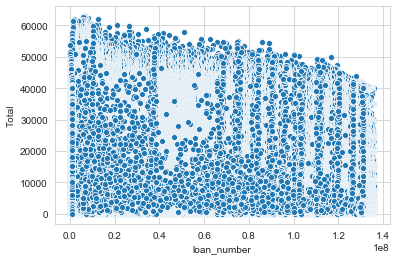

In [22]:
sns.scatterplot(x = 'loan_number', y = 'Total', data = loan)
plt.show()

In [23]:
loan.shape

(2875146, 8)

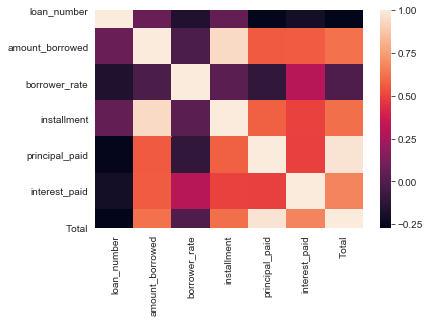

In [24]:
sns.heatmap(loan.corr())
plt.show()

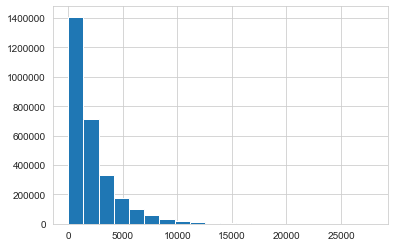

In [25]:
intr = loan['interest_paid']
intr.hist(bins= 20)
plt.show()

In [26]:
#analysing mutivarial 

In [27]:
nav = pd.read_csv('loan_data.csv')

In [28]:
amount_borrowed = nav['amount_borrowed']
principal_paid = nav['principal_paid']
interest_paid = nav['interest_paid']

In [29]:
y = np.matrix(amount_borrowed).transpose()
x1 = np.matrix(principal_paid).transpose()
x2 = np.matrix(interest_paid).transpose()

In [30]:
x = np.column_stack([x1,x2])

In [31]:
x3 = sn.add_constant(x)

In [32]:
#OLSa odinary list square

In [33]:
model = sn.OLS(y,x3)

In [34]:
model_fit = model.fit()

In [35]:
print ("the p is known as: ", model_fit.pvalues)

print (" The R- squared value is:", model_fit.rsquared )# How well the regress line appr the data

the p is known as:  [0. 0. 0.]
 The R- squared value is: 0.42281079804395916
